In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('breast-cancer.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   class        286 non-null    object
 1   age          286 non-null    object
 2   menopause    286 non-null    object
 3   tumor-size   286 non-null    object
 4   inv-nodes    286 non-null    object
 5   node-caps    286 non-null    object
 6   deg-malig    286 non-null    int64 
 7   breast       286 non-null    object
 8   breast-quad  286 non-null    object
 9   irradiated   286 non-null    object
dtypes: int64(1), object(9)
memory usage: 22.5+ KB


In [4]:
# These lines expand the size and age data into integers

In [5]:
df[['low_size','upper_size']] = df['tumor-size'].str.split('-',expand=True).astype(int)
df['mean_size'] = df[['low_size','upper_size']].mean(axis=1).astype(int)

In [6]:
df[['low_age','upper_age']] = df['age'].str.split('-',expand=True).astype(int)
df['mean_age'] = df[['low_age','upper_age']].mean(axis=1).astype(int)

In [7]:
# Next this turns the size and age columns into an array

In [8]:
Z = df[['mean_size','mean_age']]
X = np.array(Z)

In [9]:
df.head()

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiated,low_size,upper_size,mean_size,low_age,upper_age,mean_age
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no,30,34,32,30,39,34
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no,20,24,22,40,49,44
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no,20,24,22,40,49,44
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no,15,19,17,60,69,64
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no,0,4,2,40,49,44


----------------------------
### Using one of the three datasets to demonstrate k-means clustering using the scikit learn package

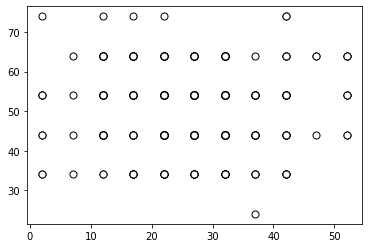

In [10]:

plt.scatter(
   X[:, 0], X[:, 1],
   c='white', marker='o',
   edgecolor='black', s=50
)
plt.show()

In [11]:
km = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(X)

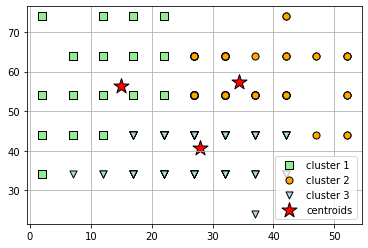

In [12]:
# plot the 3 clusters
plt.scatter(
    X[y_km == 0, 0], X[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    X[y_km == 1, 0], X[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    X[y_km == 2, 0], X[y_km == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

--------------------
### Calculate the sum of least square error for each different values of 'k'. Using Matplotlib determine the optimal number of clusters (k) using the elbow method along with a brief explanation 

C:\Users\Jackie\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


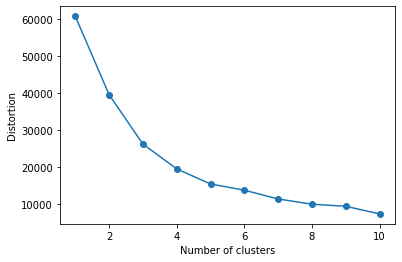

In [13]:
# calculate distortion for a range of number of cluster
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(X)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

----------------
### Finally plot the optimal clusters with their centroids along with a brief explanation

In [14]:
# I chose k = 5 because thats when the SSE seems to level off according
# to the graph shown above.

In [15]:
km = KMeans(
    n_clusters=5, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(X)

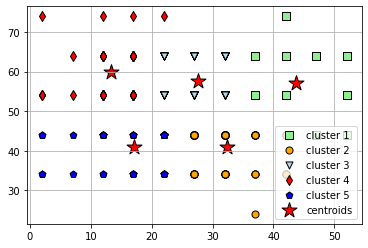

In [16]:
# plot the 3 clusters
plt.scatter(
    X[y_km == 0, 0], X[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    X[y_km == 1, 0], X[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    X[y_km == 2, 0], X[y_km == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

plt.scatter(
    X[y_km == 3, 0], X[y_km == 3, 1],
    s=50, c='red',
    marker='d', edgecolor='black',
    label='cluster 4'
)

plt.scatter(
    X[y_km == 4, 0], X[y_km == 4, 1],
    s=50, c='blue',
    marker='p', edgecolor='black',
    label='cluster 5'
)

# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [17]:
# The graph shows the centroids of the k = 5 centroids